In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]  # Bigger images
plt.rcParams['font.size']= 14

pd.set_option('display.max_columns', None)

In [15]:
data_file = 'data/part206/part206_pilot.acq'
sample_rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})



In [16]:
p = 'data/part206/part206_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))

<IPython.core.display.Javascript object>


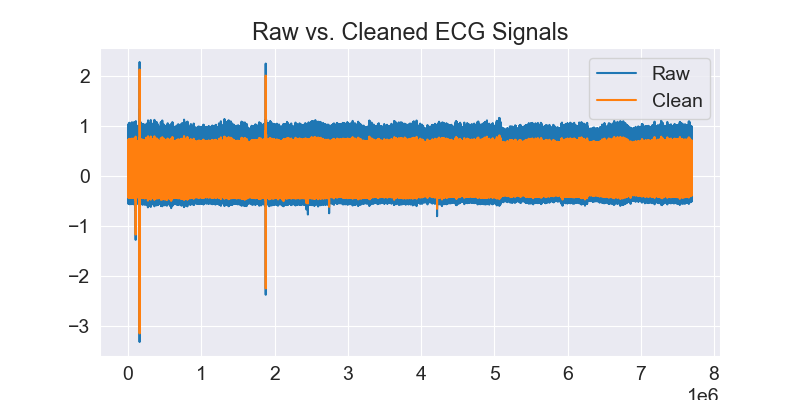

In [17]:
plt.figure()
raw =plt.plot(ecg['ECG_Raw'],label='Raw')
clean = plt.plot(ecg['ECG_Clean'],label='Clean')
plt.legend()
plt.title('Raw vs. Cleaned ECG Signals')
plt.show()

In [32]:
meth = 'biosppy'
ecg_2012 = nk.ecg_clean(ecg['ECG_Raw'],sampling_rate=2000,method=meth)

<IPython.core.display.Javascript object>


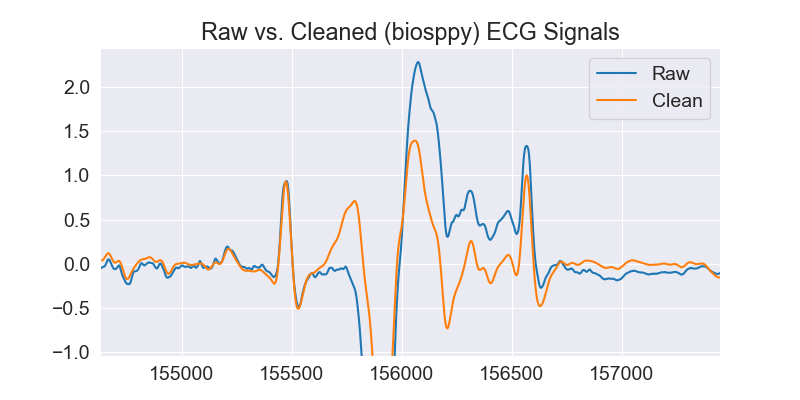

In [33]:
plt.figure()
raw =plt.plot(ecg['ECG_Raw'],label='Raw')
clean = plt.plot(ecg_2012,label='Clean')
plt.legend()
title = 'Raw vs. Cleaned ('+ meth+ ') ECG Signals'
plt.title(title)
plt.show()
plt.savefig('data/part206/figures/'+title+'.png')

In [45]:
start_times = [317250, 1023250, 1567250, 2101250, 2659250, 3307250, 3843250, 4377250, 4913250, 5451250, 5939250, 6503250]
feedback_times = [950589, 1495874, 2029686, 2580921, 3103039, 3767436, 4295163, 4844705, 5378331, 5858753, 6393158, 6956801]
taskload_settings = [3.0, 3.0, 2.0 ,3.0 ,2.0, 4.0 ,2.0 ,4.0,4.0	,2.0,4.0,3.0]
trust_settings = [1,1,1,1,0,1,0,1,1,1,1,0]
elapsed_time_lockin=[6.30000000000000, 5.06666666666666, 7.93333333333333, 5, 8.63333333333333, 6.40000000000000, 9.10000000000000, 6.33333333333334, 6.80000000000000,5.66666666666666,5.26666666666667,7.36666666666667]



In [21]:
display(nk.ecg_analyze(ecg))

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,100.969977,44.630325,1188.632221,88.105534,44.633771,0.074123,0.037548,1180.0,74.13,0.062822,100.0,15.446401,49.258573,767.0,16.685567,0.000449,0.002071,0.001982,0.000212,0.000006,9.340044,0.41979,0.044945,-8.458155,31.560842,120.54392,0.26182,11952.087469,3.819414,4.784414,1841.628517,0.408403,0.398995,0.543307,0.087297,50.023235,50.00177,50.047832,52.811813,0.596502,0.403498,24.37555,20.047928,0.45355,0.54645,81.181637,89.108801,0.46272,0.53728,59.935906,64.584433,1.221702,1.041958


In [46]:
med_tl_ind = [i for i, x in enumerate(taskload_settings) if x == 3.0]
high_tl_ind = [i for i, x in enumerate(taskload_settings) if x == 2.0]
low_tl_ind = [i for i, x in enumerate(taskload_settings) if x == 4.0]

low_rel_ind = [i for i, x in enumerate(trust_settings) if x == 1]
high_rel_ind = [i for i, x in enumerate(trust_settings) if x == 0]

pilot_start = 0
pilot_stop = 50
ecg_pilot_epoch = nk.epochs_create(ecg, events=start_times, sampling_rate=2000, epochs_start= pilot_start, epochs_end=pilot_stop)
eda_pilot_epoch = nk.epochs_create(eda, events=start_times, sampling_rate=2000, epochs_start= pilot_start, epochs_end=pilot_stop)
rsp_pilot_epoch = nk.epochs_create(rsp, events=start_times, sampling_rate=2000, epochs_start= pilot_start, epochs_end=pilot_stop)

trust_start = 50
trust_stop = 70
ecg_trust_epoch = nk.epochs_create(ecg, events=start_times, sampling_rate=2000, epochs_start= trust_start, epochs_end=trust_stop)
eda_trust_epoch = nk.epochs_create(eda, events=start_times, sampling_rate=2000, epochs_start= trust_start, epochs_end=trust_stop)
rsp_trust_epoch = nk.epochs_create(rsp, events=start_times, sampling_rate=2000, epochs_start= trust_start, epochs_end=trust_stop)

decision_start=-5
decision_stop=15
ecg_decision_epoch = nk.epochs_create(ecg, events=feedback_times, sampling_rate=2000, epochs_start= decision_start, epochs_end=decision_stop)
eda_decision_epoch = nk.epochs_create(eda, events=feedback_times, sampling_rate=2000, epochs_start= decision_start, epochs_end=decision_stop)
rsp_decision_epoch = nk.epochs_create(rsp, events=feedback_times, sampling_rate=2000, epochs_start= decision_start, epochs_end=decision_stop)


Pilotting Interval Data Analysis

In [80]:
#Does not work
#plot = nk.ecg_plot(ecg_pilot_epoch['1']['ECG_Clean'], sampling_rate=2000)

ValueError: NeuroKit error: ecg_plot(): The `ecg_signals` argument must be the DataFrame returned by `ecg_process()`.

In [88]:
ecg_pilot_epoch['1']

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,ECG_P_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
Index,,,,,,,,,,,,,,,
317250,-0.117950,-0.116606,117.979247,0.893801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191235,1.0,0.182278
317251,-0.116425,-0.114889,117.980590,0.893785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192563,1.0,0.183544
317252,-0.113678,-0.113199,117.981932,0.893768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193891,1.0,0.184810
317253,-0.113220,-0.111536,117.983272,0.893752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195219,1.0,0.186076
317254,-0.111694,-0.109899,117.984609,0.893735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196547,1.0,0.187342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417245,0.007019,0.009155,91.525196,0.979827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633367,0.0,0.074627
417246,0.006561,0.009481,91.534707,0.979791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634366,0.0,0.076119
417247,0.007019,0.009792,91.544220,0.979754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.635365,0.0,0.077612


<IPython.core.display.Javascript object>


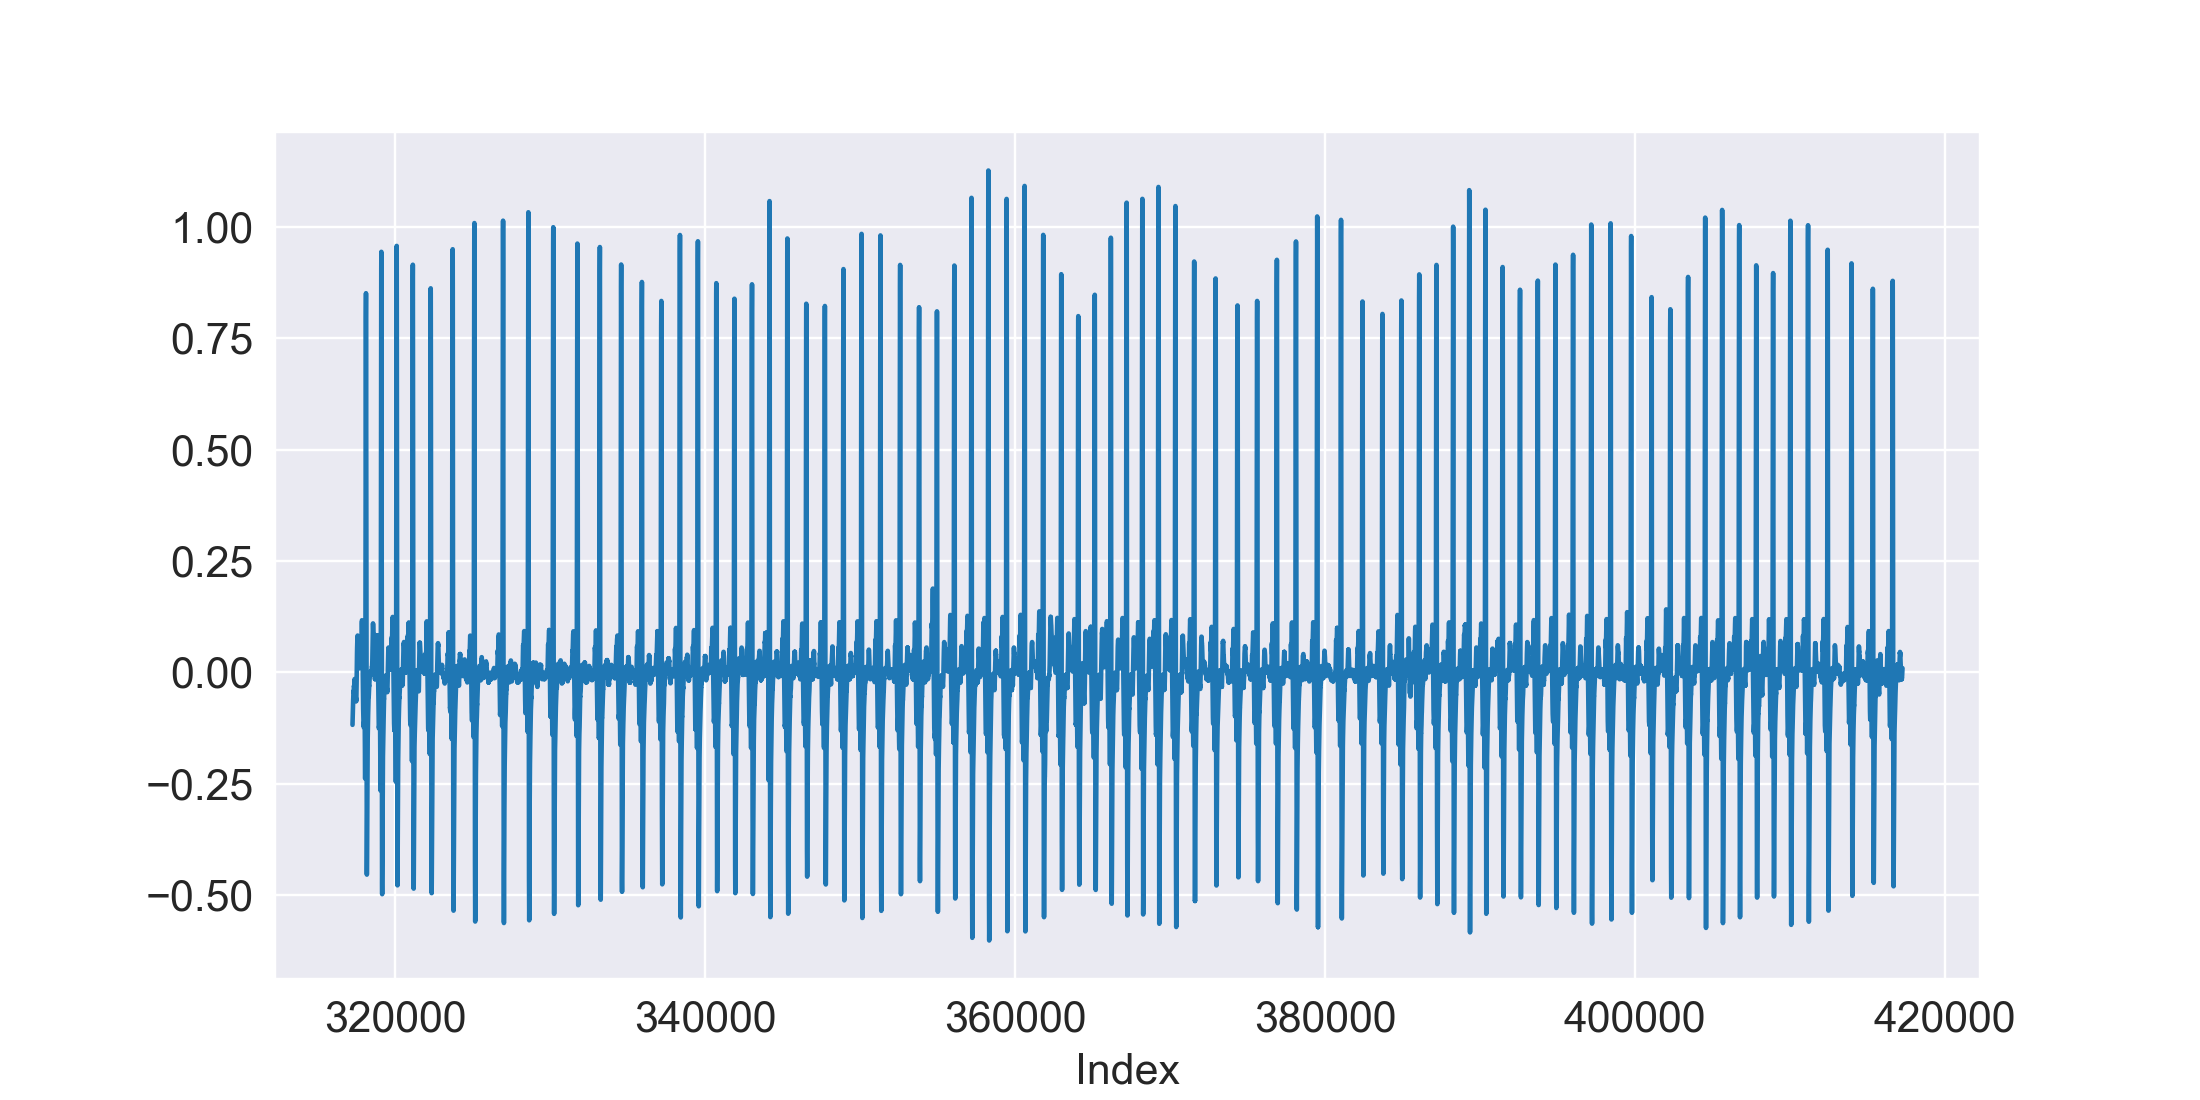

In [82]:
ecg_pilot_epoch['1']['ECG_Raw'].plot()

<IPython.core.display.Javascript object>


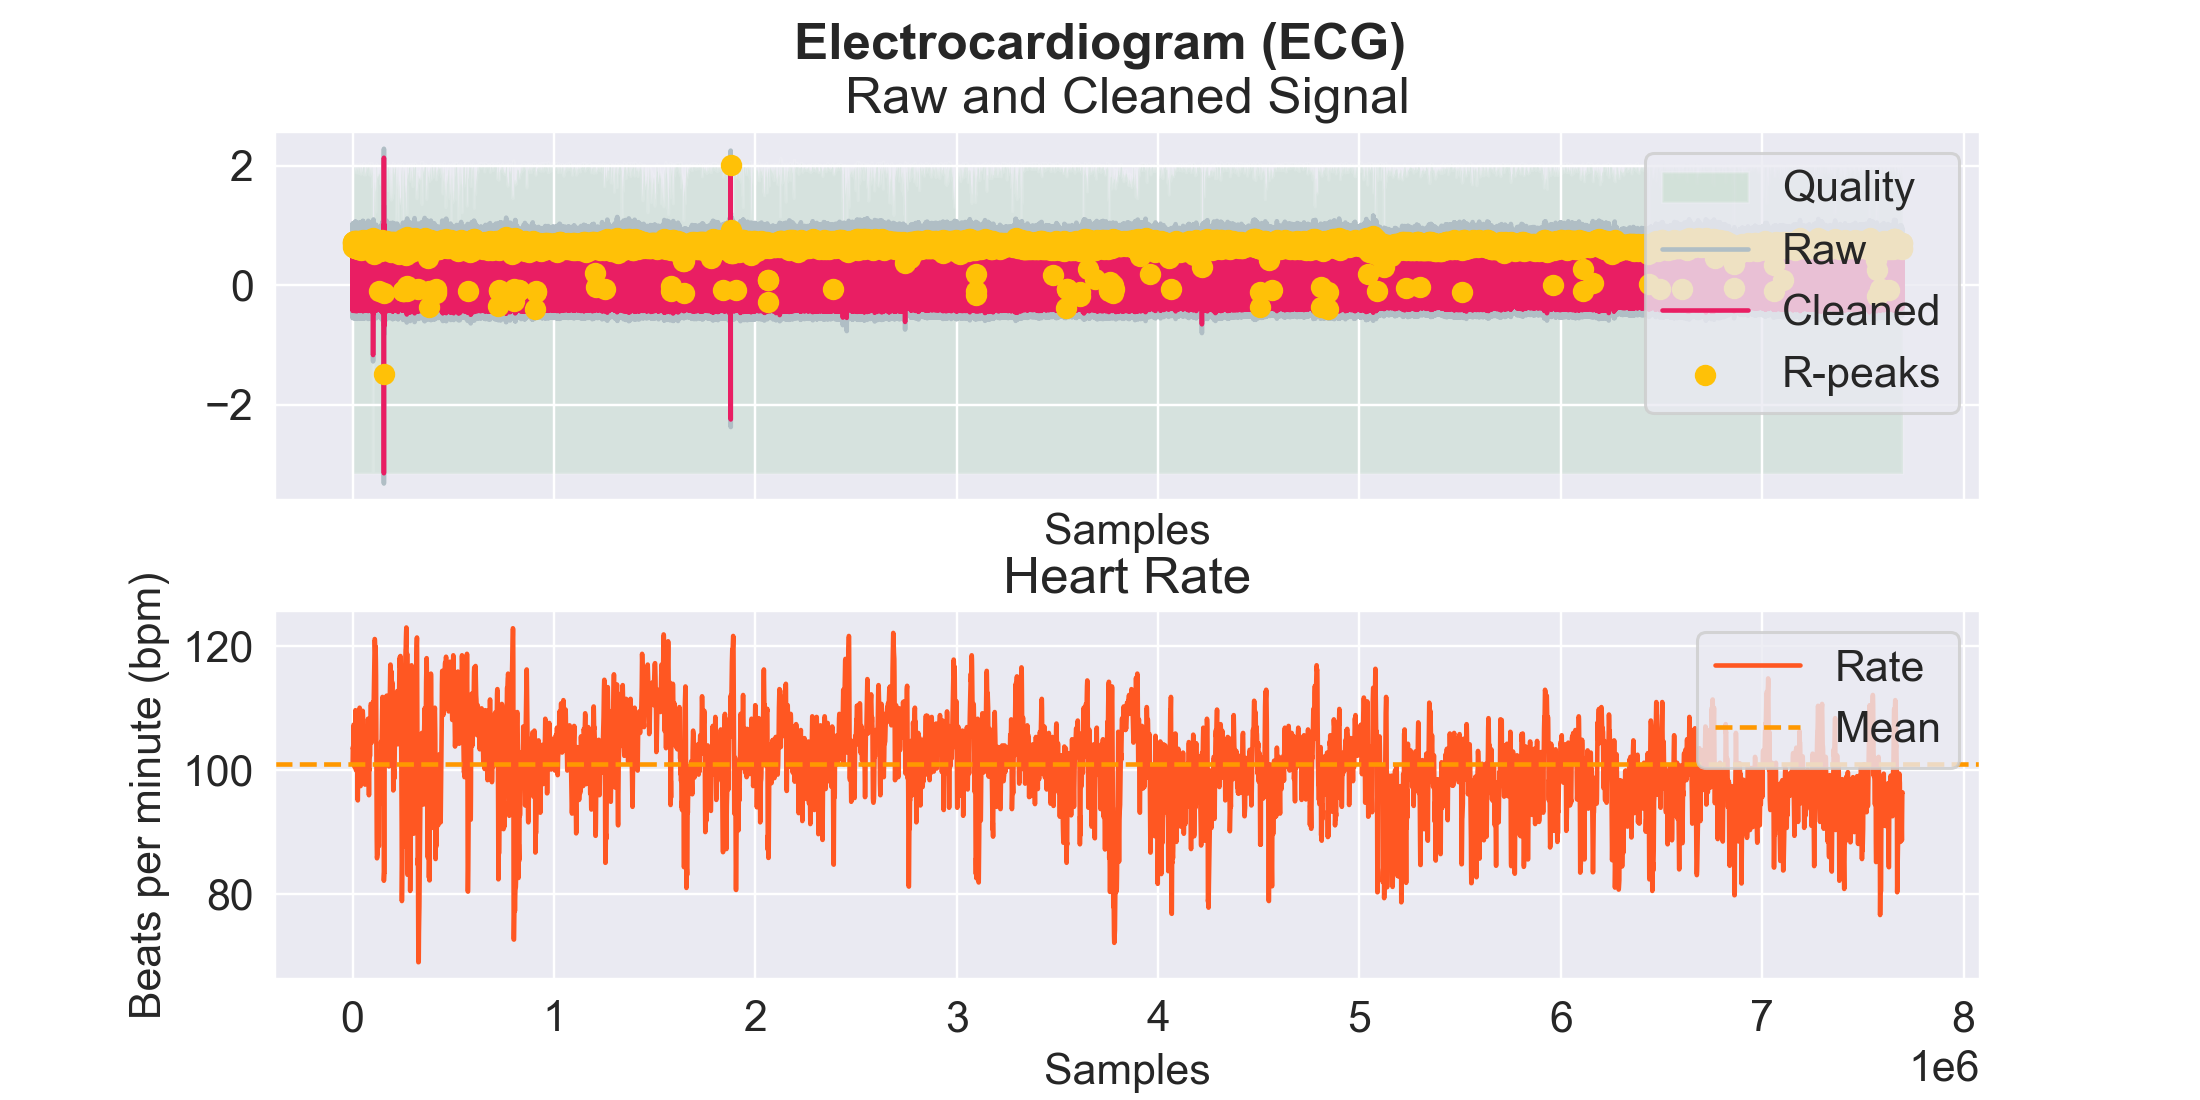

In [86]:
plot = nk.ecg_plot(ecg)

<IPython.core.display.Javascript object>


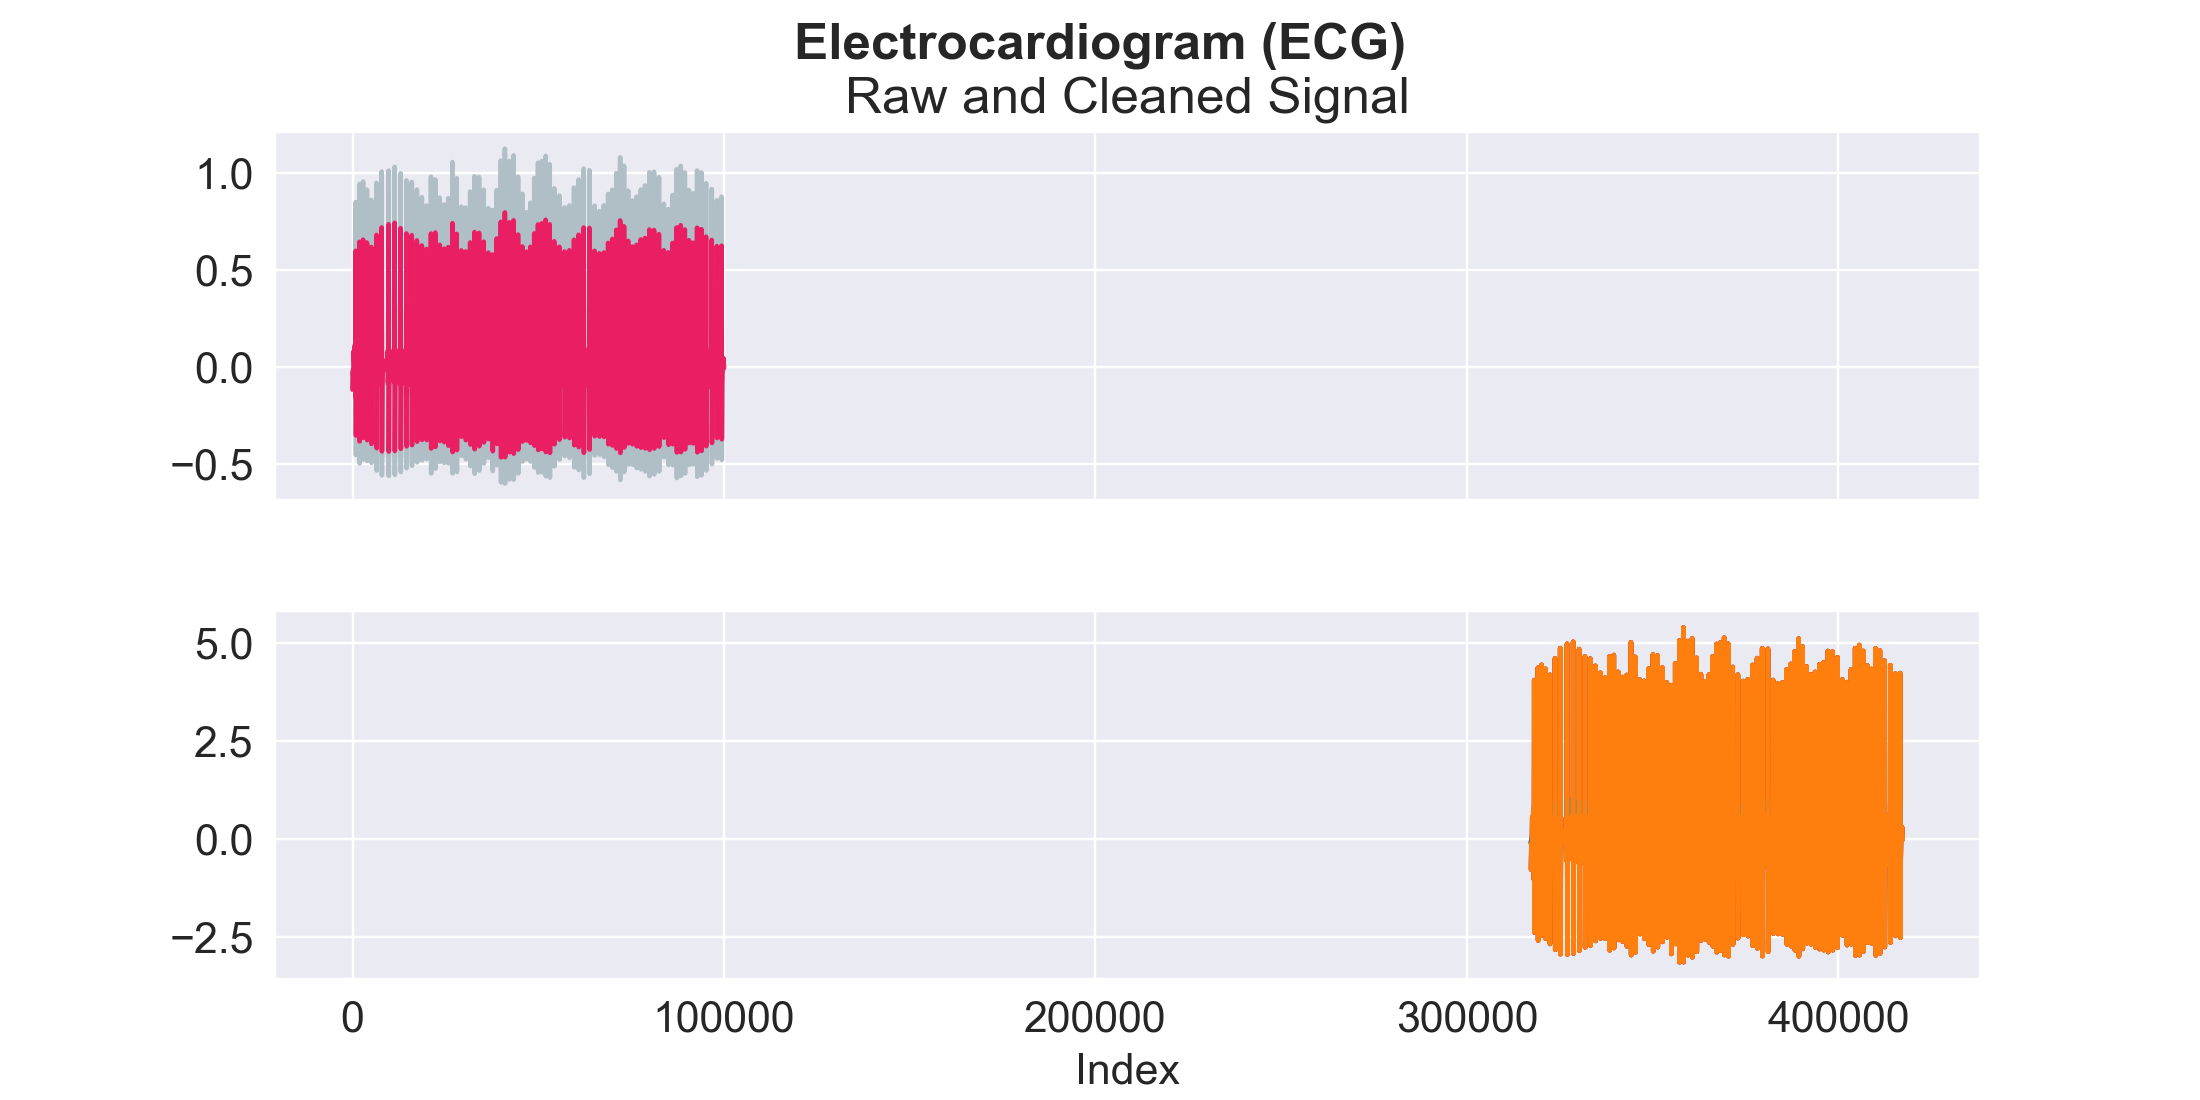

KeyError: "None of [Int64Index([  865,  1857,  2845,  3887,  5041,  6458,  7858,  9600, 11342,\n            12948, 14504, 15953, 17328, 18665, 19919, 21121, 22279, 23466,\n            24634, 25768, 26900, 28052, 29270, 30470, 31669, 32836, 34056,\n            35327, 36548, 37701, 38823, 39930, 41021, 42194, 43356, 44558,\n            45720, 46822, 47882, 48921, 49939, 50955, 51993, 53086, 54296,\n            55693, 57091, 58359, 59631, 60864, 62317, 63694, 65155, 66442,\n            67664, 68816, 69928, 71004, 72042, 73090, 74196, 75318, 76466,\n            77603, 78741, 79913, 81165, 82489, 83806, 85015, 86161, 87266,\n            88359, 89459, 90557, 91647, 92761, 93901, 95303, 96624, 97992,\n            99361],\n           dtype='int64', name='Index')] are in the [index]"

In [89]:
#Does not work
#plot = nk.ecg_plot(ecg_pilot_epoch['1'])

<IPython.core.display.Javascript object>


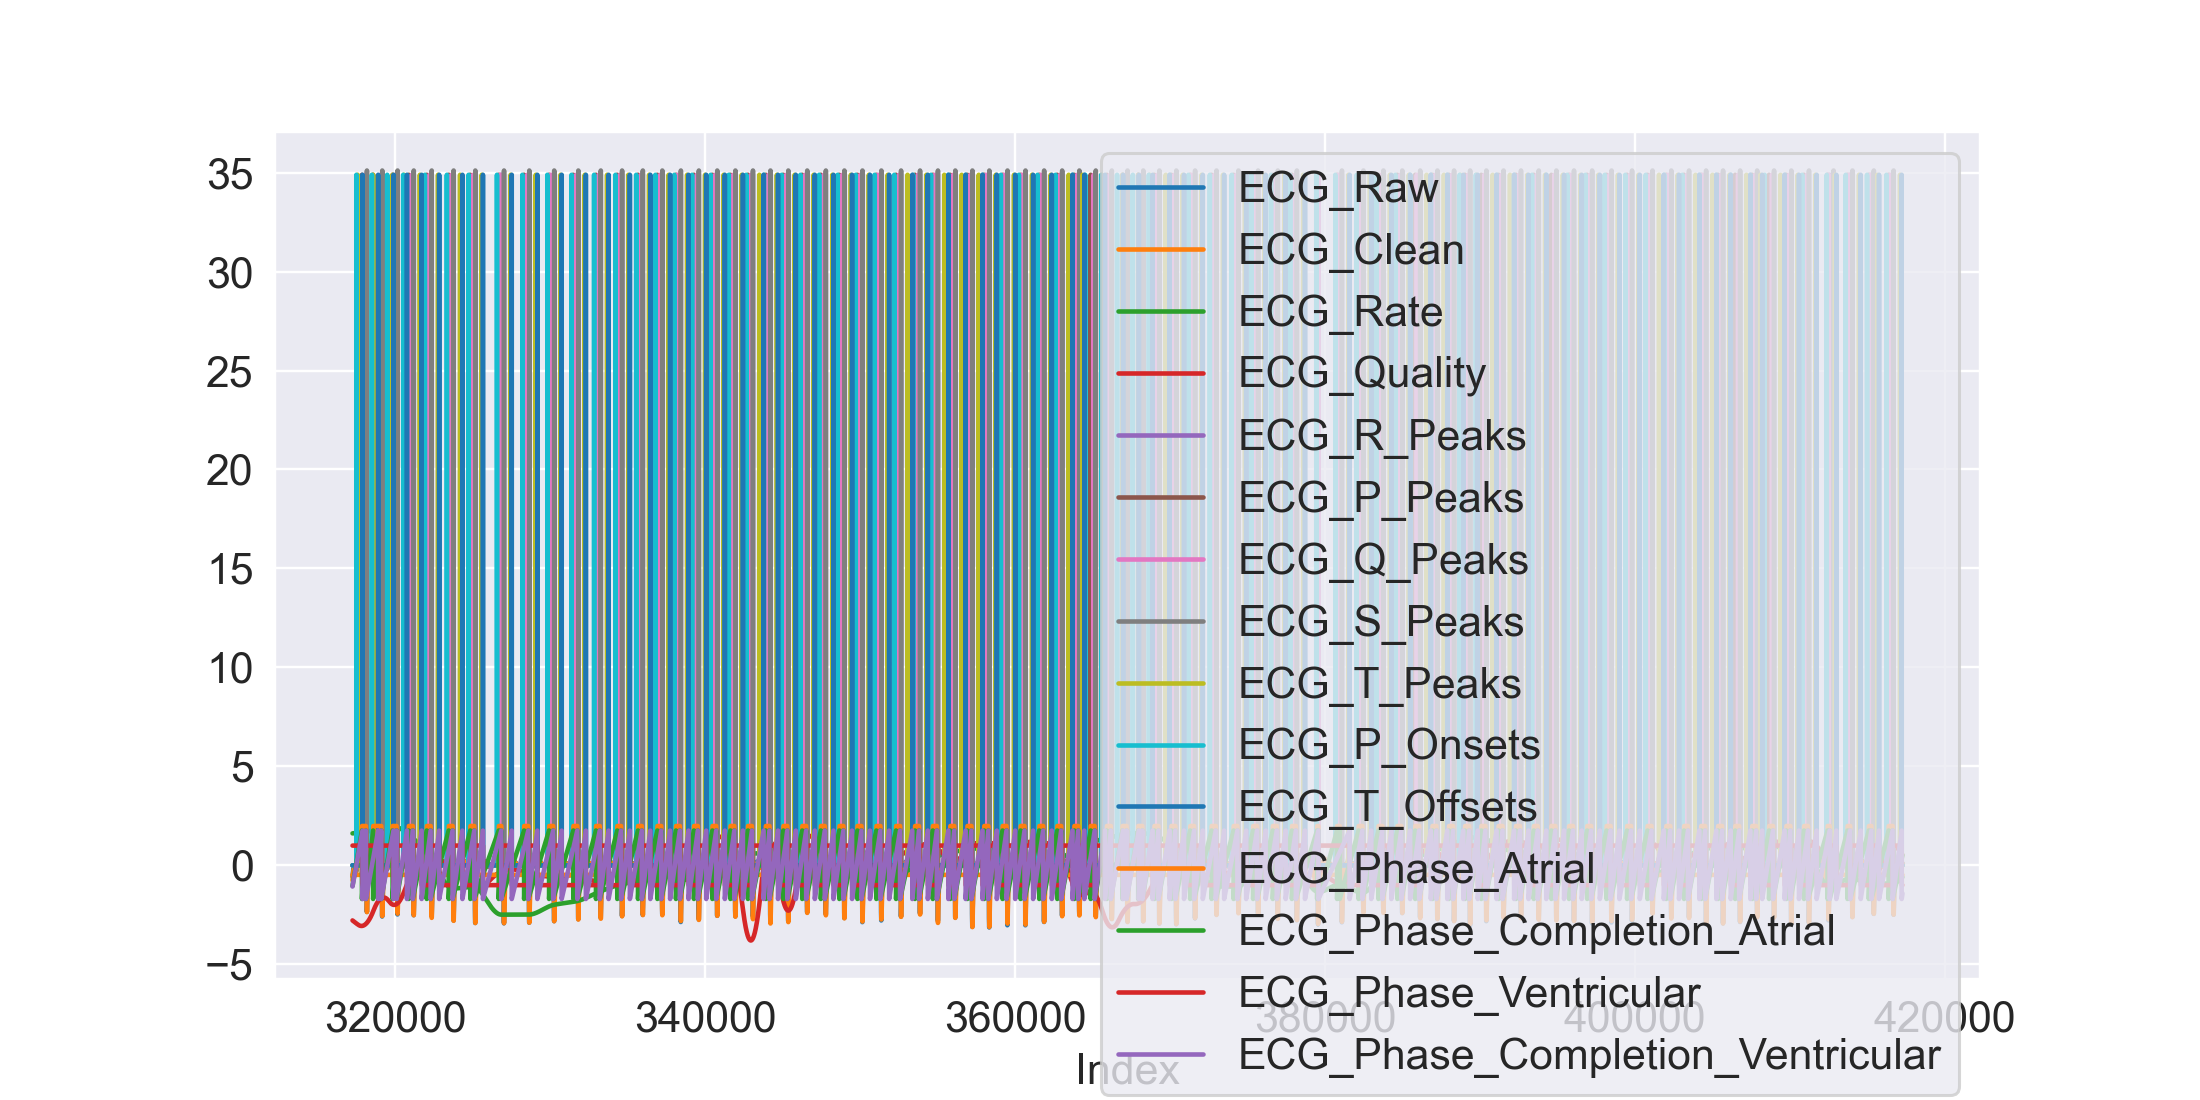

In [109]:
nk.standardize(ecg_pilot_epoch['1']).plot()  # Plot scaled signals"

In [111]:
ecg_pilot_epoch['1']['ECG_Raw'][:2]

Index
317250   -0.117950
317251   -0.116425
Name: ECG_Raw, dtype: float64

<IPython.core.display.Javascript object>


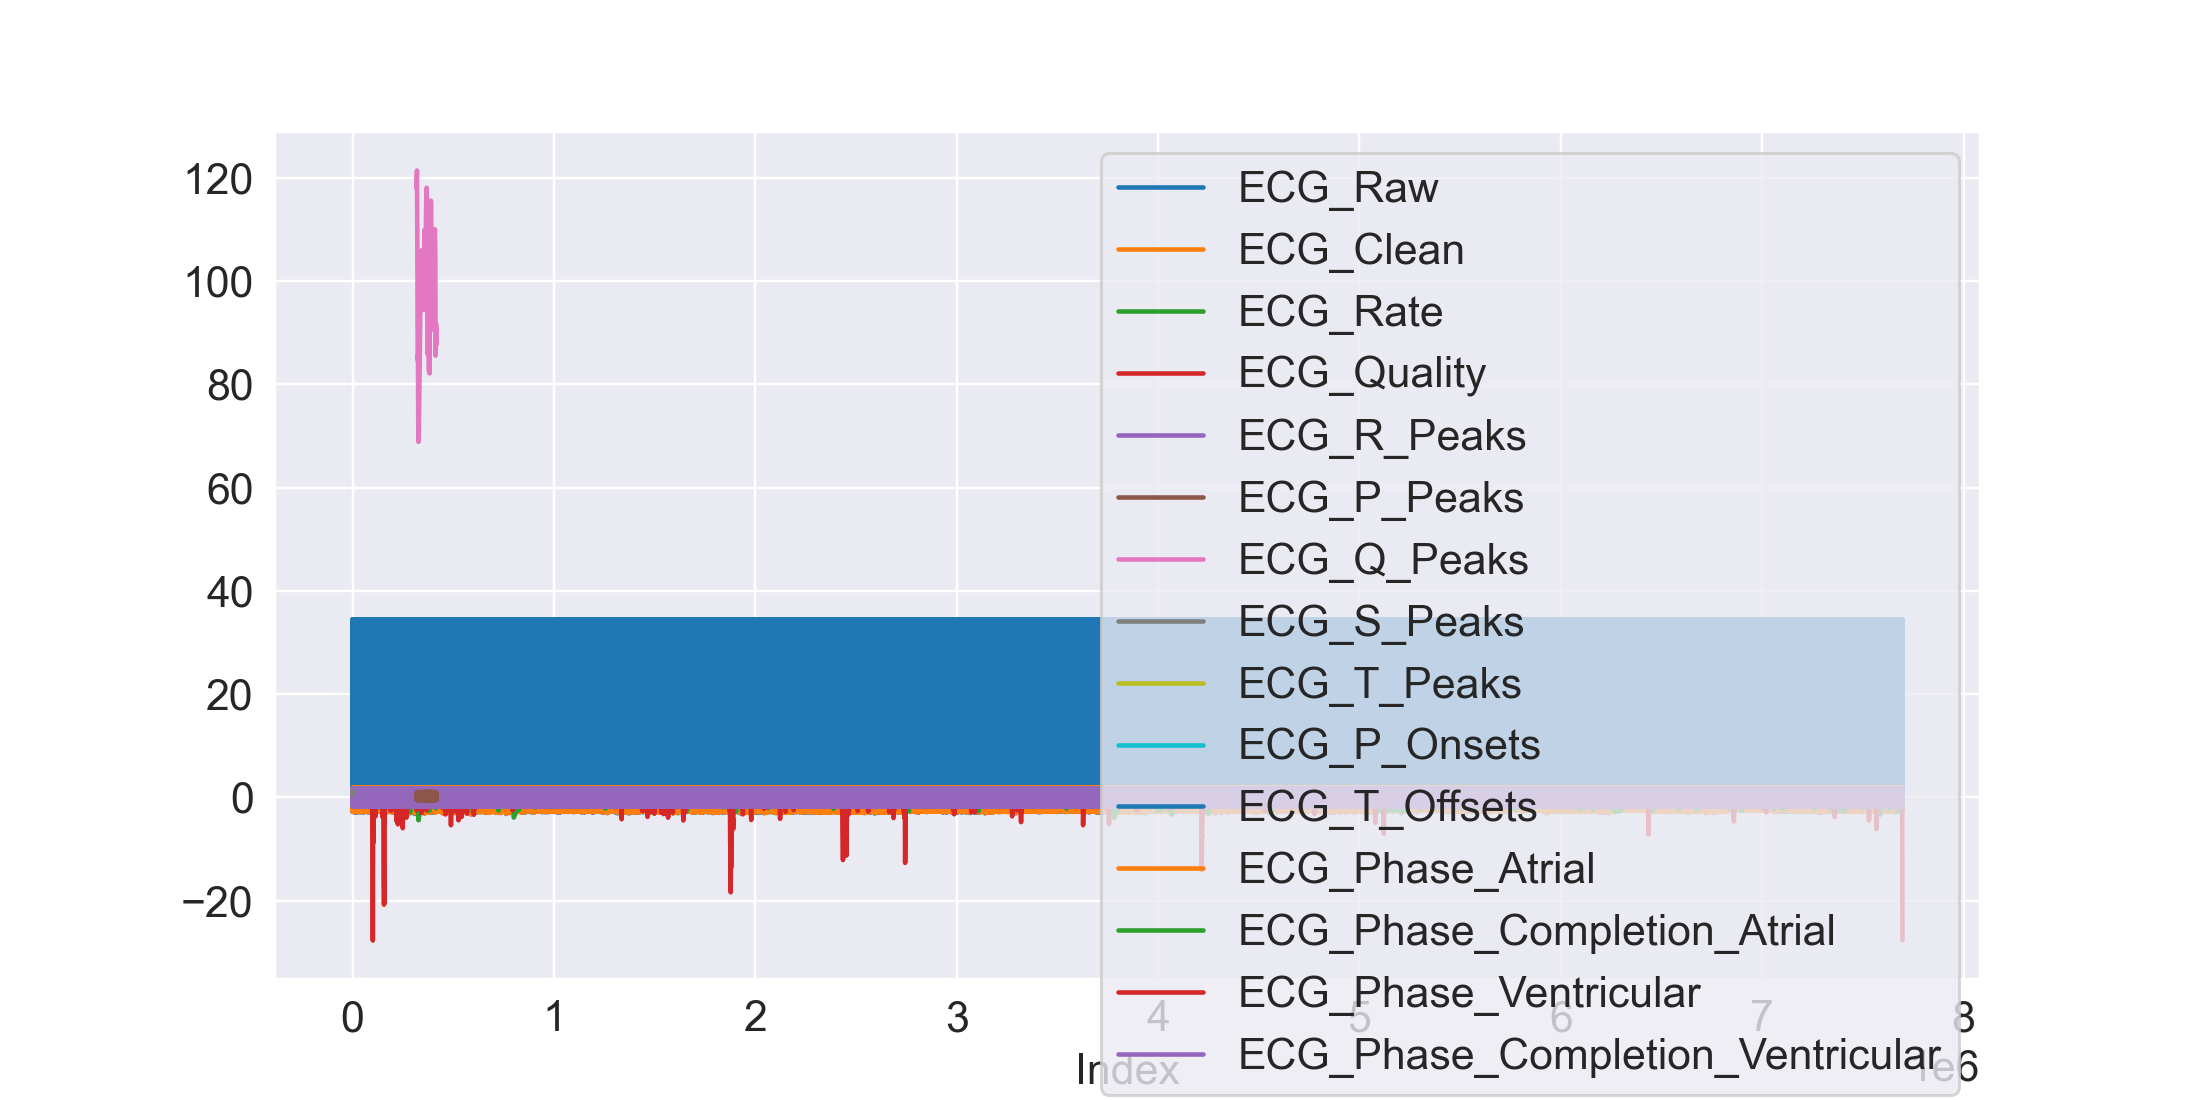

In [114]:
nk.standardize(ecg).plot()  # Plot scaled signals"

In [116]:
ecg_pilot_epoch['1']['ECG_Rate'].plot()

Do EDA Piloting Interval Analysis

In [118]:
eda_pilot_epoch['1']

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,Index,Label
0.0000,1.211511,1.217904,1.243654,-0.025751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317250,1
0.0005,1.214563,1.217872,1.243626,-0.025754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317251,1
0.0010,1.214563,1.217840,1.243597,-0.025757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317252,1
0.0015,1.216088,1.217808,1.243568,-0.025760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317253,1
0.0020,1.214563,1.217777,1.243539,-0.025763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.9980,0.517236,0.517719,0.554987,-0.037268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,417245,1
49.9985,0.517236,0.517716,0.554986,-0.037270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,417246,1
49.9990,0.518762,0.517713,0.554986,-0.037273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,417247,1
49.9995,0.521813,0.517711,0.554986,-0.037275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,417248,1


In [120]:
cleaned = eda_pilot_epoch['1']["EDA_Clean"]

<IPython.core.display.Javascript object>


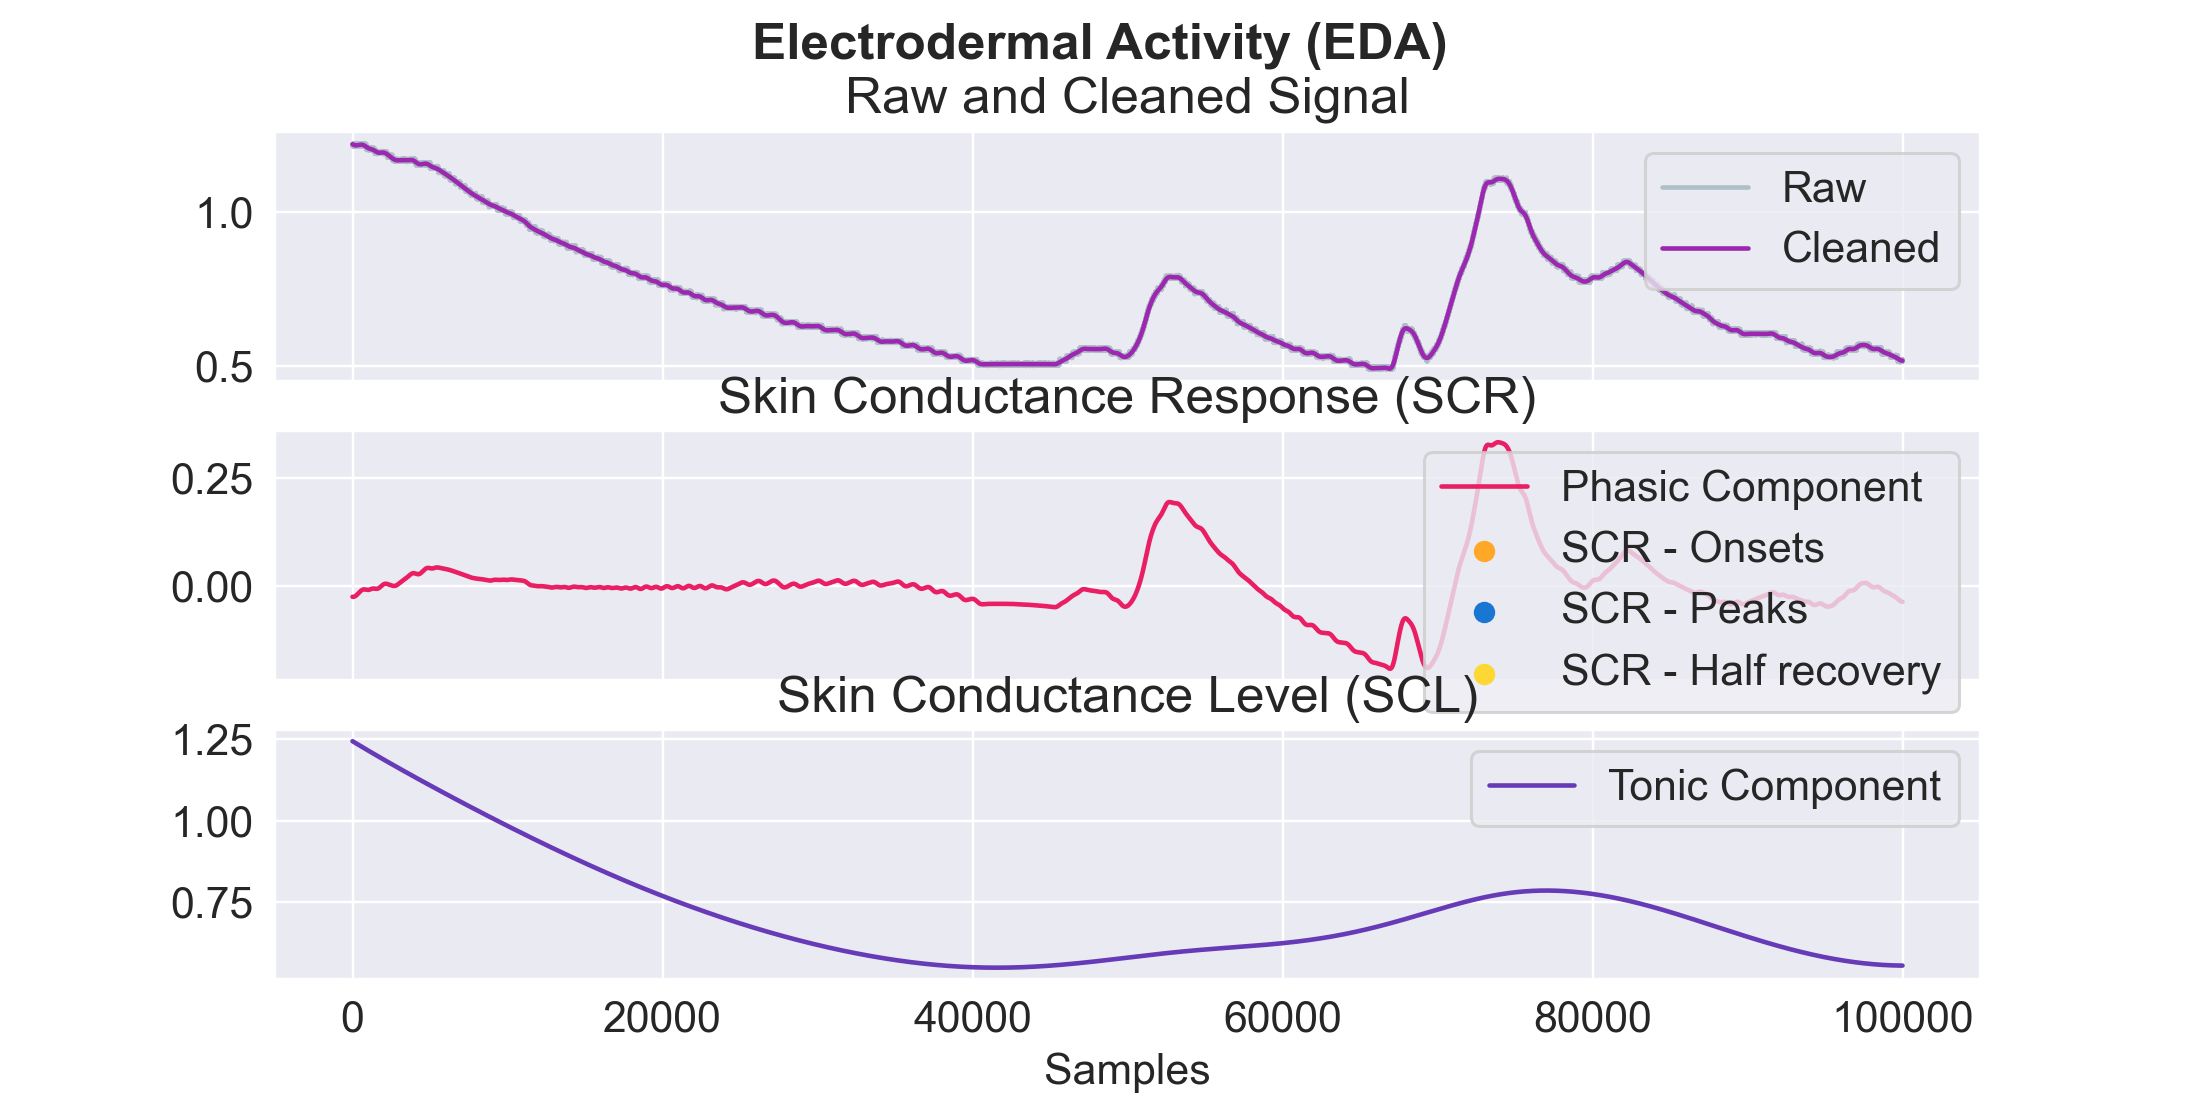

<IPython.core.display.Javascript object>


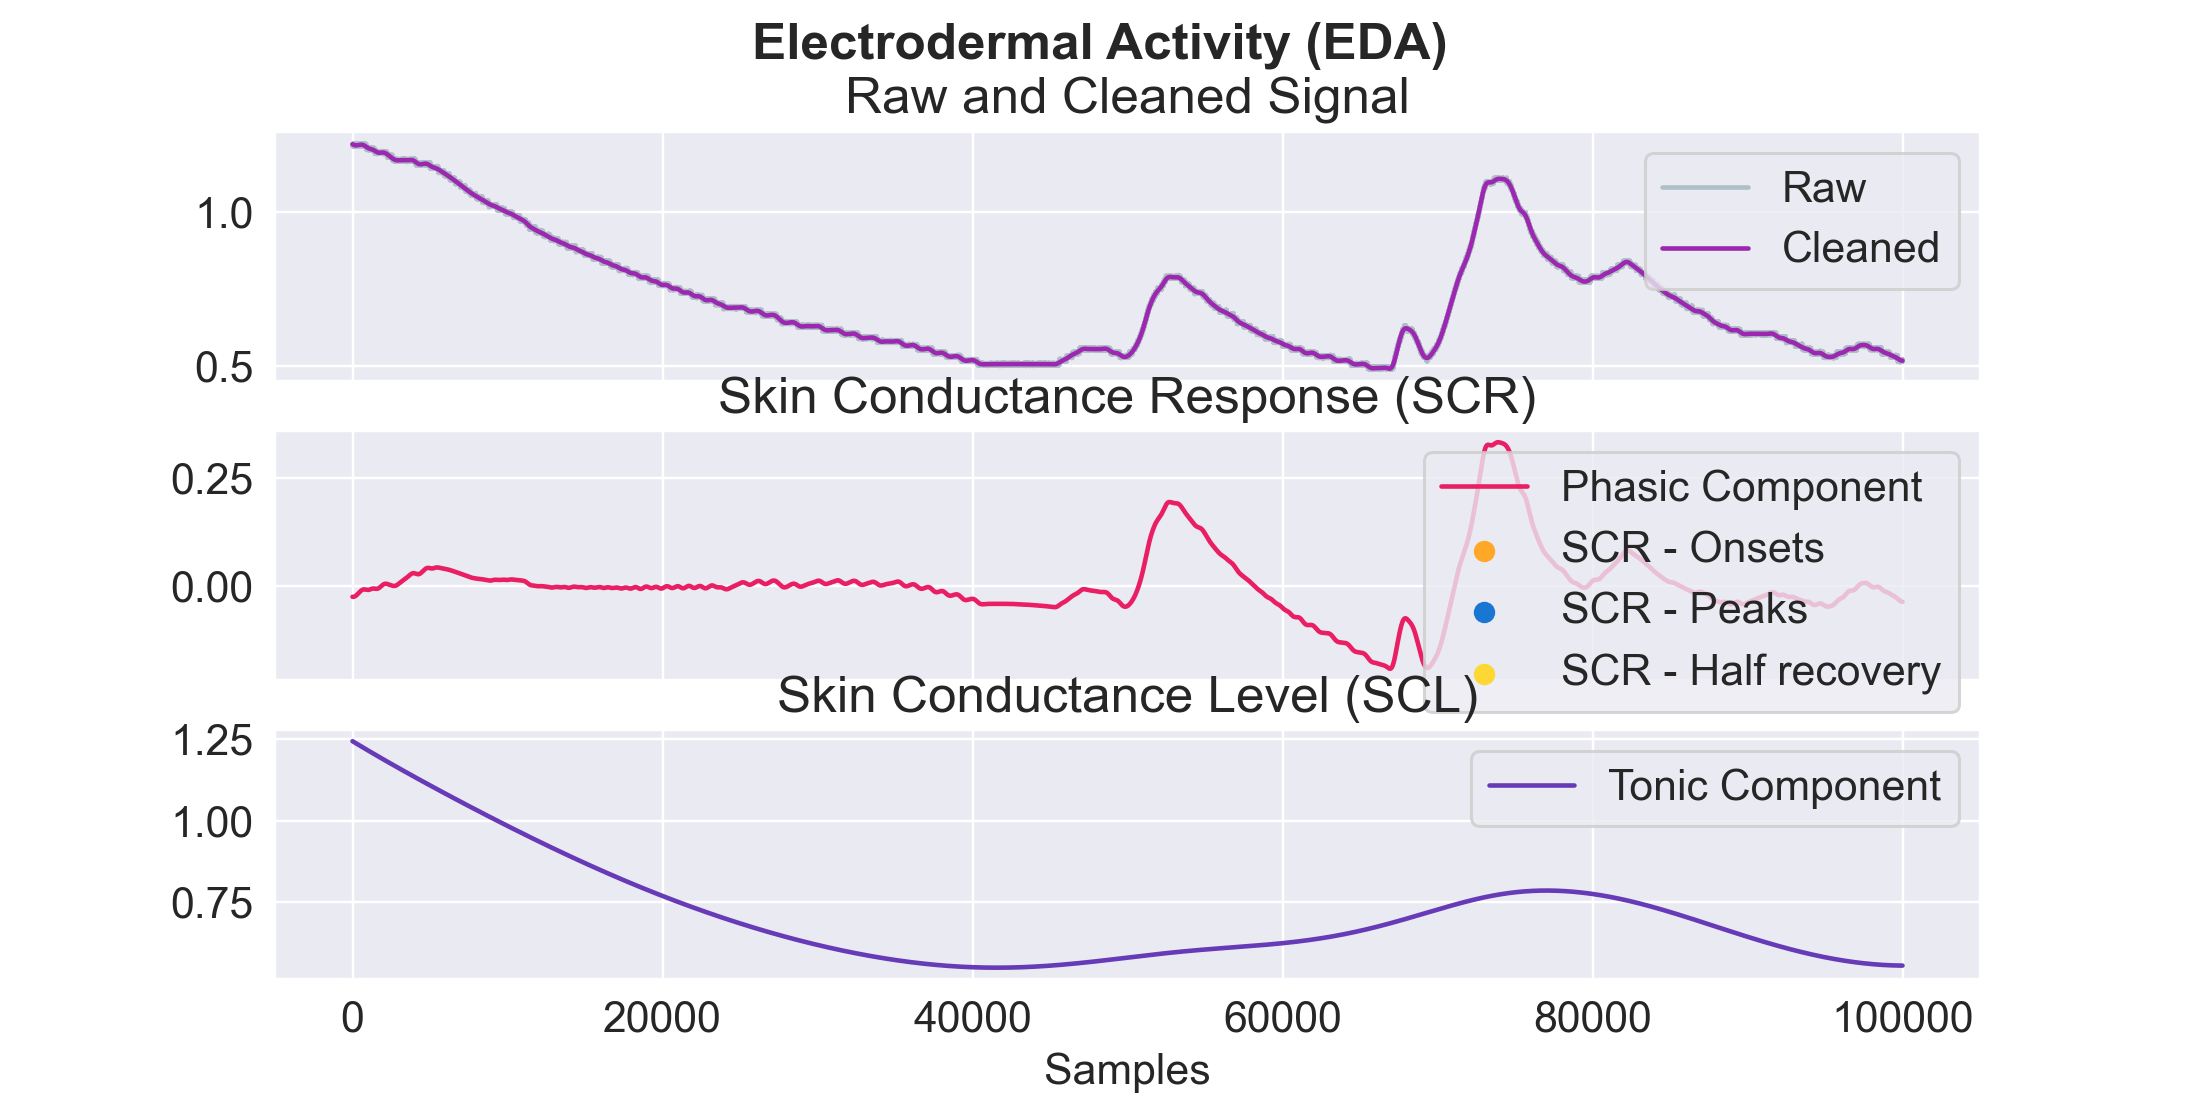

In [126]:
nk.eda_plot(eda_pilot_epoch['1'])

In [127]:
eda_pilot_epoch['1']["SCR_Peaks"]

0.0000     0.0
0.0005     0.0
0.0010     0.0
0.0015     0.0
0.0020     0.0
          ... 
49.9980    0.0
49.9985    0.0
49.9990    0.0
49.9995    0.0
50.0000    0.0
Name: SCR_Peaks, Length: 100000, dtype: float64

In [128]:
[i for i, x in enumerate(eda_pilot_epoch['1']['SCR_Peaks']) if x != 0.0]

[]

<IPython.core.display.Javascript object>


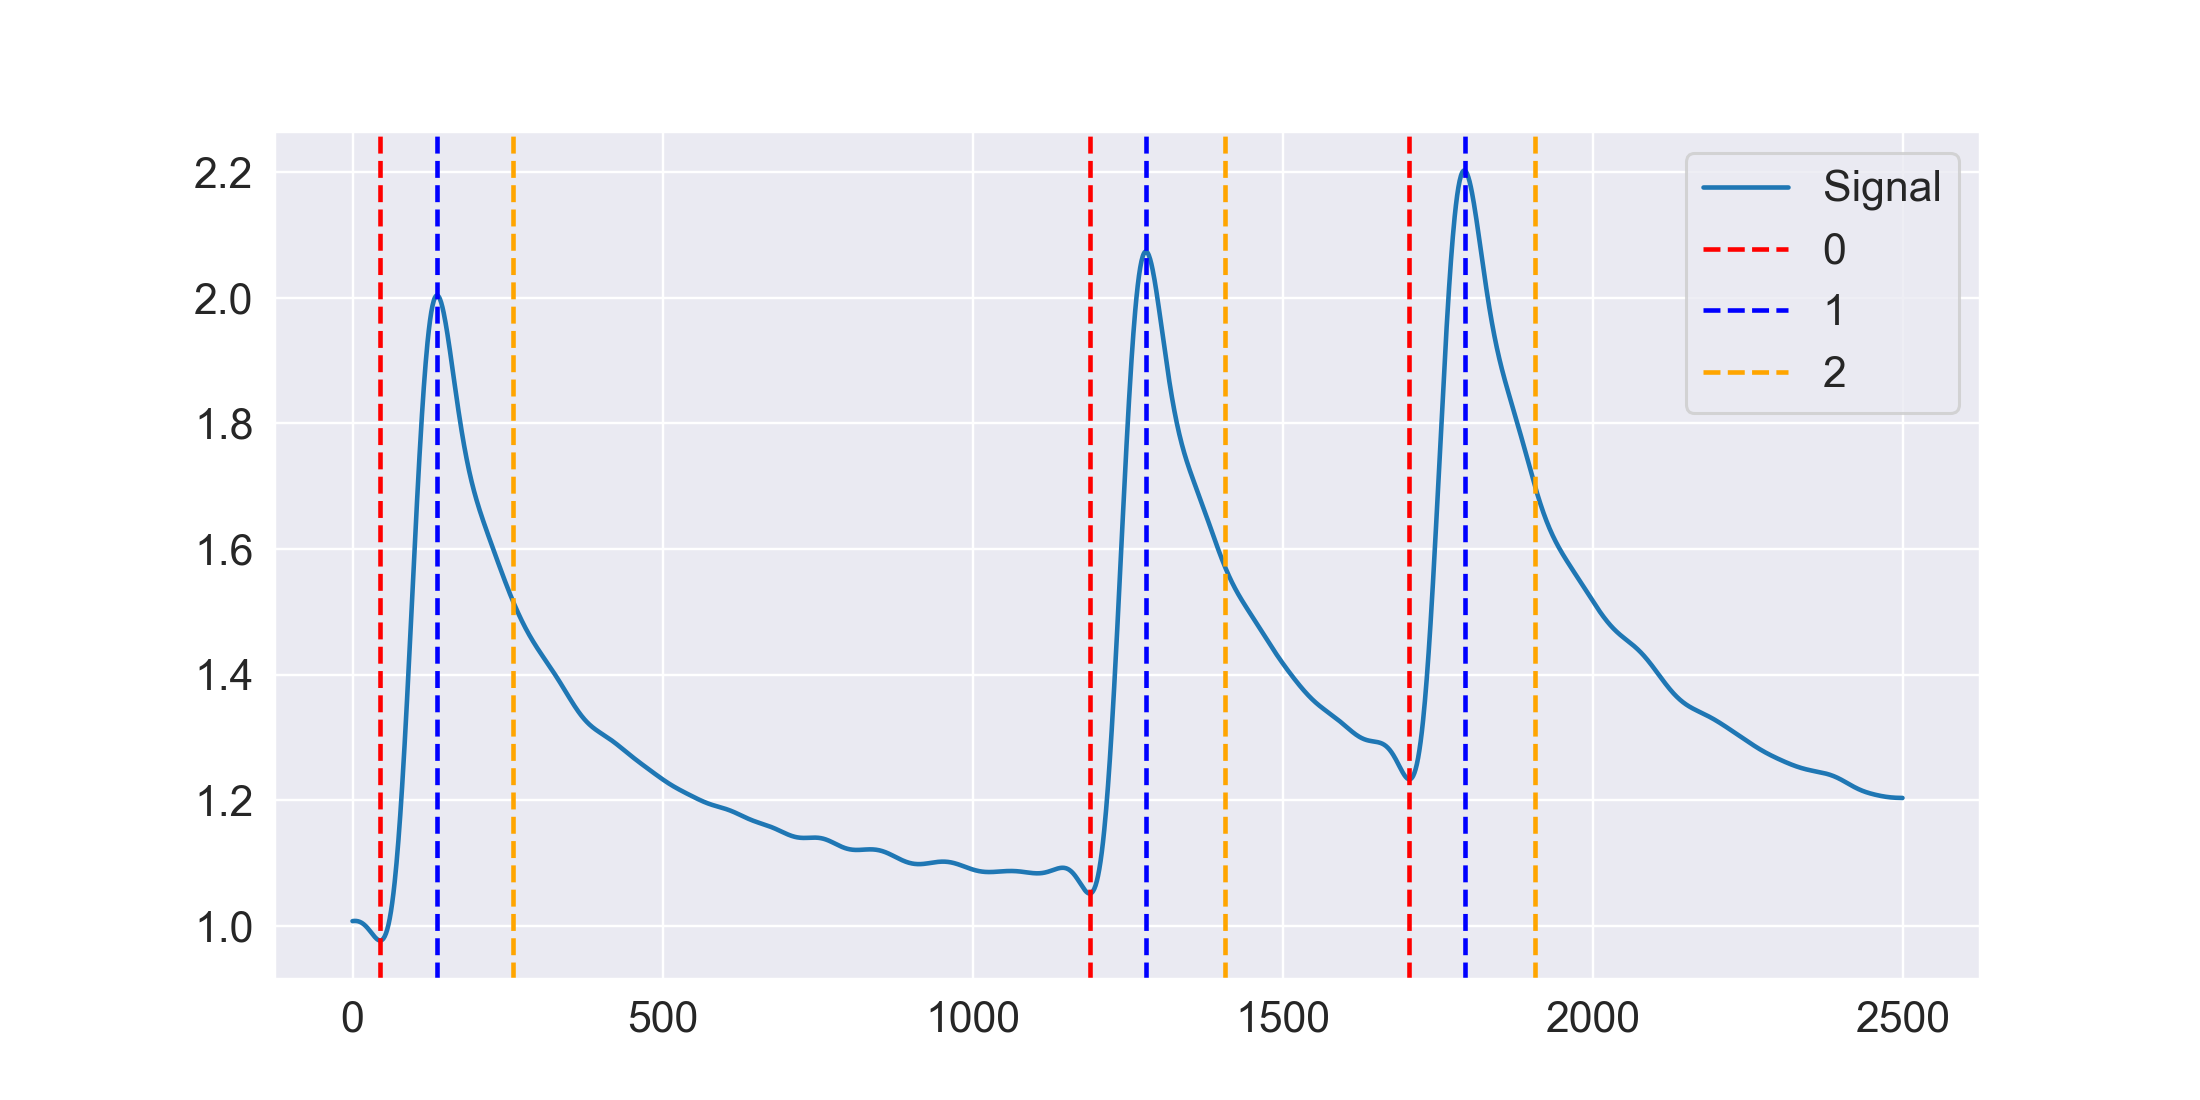

In [138]:
# Simulate 10 seconds of EDA Signal (recorded at 250 samples / second)
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)
signals, info = nk.eda_process(eda_signal, sampling_rate=250)
# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

In [185]:
print([i for i, x in enumerate(signals['SCR_Peaks']) if x != 0.0])
print([i for i, x in enumerate(eda_pilot_epoch['1']['SCR_Peaks'][:]) if x != 0.0])

[136, 1279, 1793]
[]


In [147]:
eda_phasic =eda_pilot_epoch['1']['EDA_Phasic']
_,kim2004 = nk.eda_peaks(eda_phasic, method="kim2004")
neurokit = nk.eda_peaks(eda_phasic, method="neurokit")
_,nabian2018 = nk.eda_peaks(eda_phasic, method="nabian2018")

In [144]:
kim2004

{'SCR_Onsets': array([ 2613, 45164, 49853, 66780, 69394, 79435, 95202], dtype=int64),
 'SCR_Peaks': array([ 3358, 46194, 51167, 67418, 72601, 81751, 96232], dtype=int64),
 'SCR_Height': array([2.74554826e-05, 2.57756664e-05, 1.52963614e-04, 1.53654962e-04,
        2.08758481e-04, 4.29855426e-05, 2.99438456e-05]),
 'SCR_Amplitude': array([0.0003551 , 0.04918329, 0.04888194, 0.18983757, 0.19081169,
        0.0045694 , 0.04860222]),
 'SCR_RiseTime': array([0.745, 1.03 , 1.314, 0.638, 3.207, 2.316, 1.03 ]),
 'SCR_Recovery': array([36380., 46407., 58945., 68395.,    nan, 85733., 99450.]),
 'SCR_RecoveryTime': array([33.022,  0.213,  7.778,  0.977,    nan,  3.982,  3.218])}

In [161]:
neurokit[0][5457:5459]

,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
5457,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0
5458,0.0,1.0,0.042476,0.002402,0.334,0.0,0.0


In [146]:
nabian2018

{'SCR_Onsets': array([ 1884,  2776, 23107, 24680, 28150, 29121, 35873, 50729, 71104,
        79723, 97148], dtype=int64),
 'SCR_Peaks': array([ 2140,  5459, 23198, 27180, 28463, 31304, 36161, 52709, 73910,
        82253, 97560], dtype=int64),
 'SCR_Height': array([0.00462197, 0.04247513, 0.00068312, 0.01198277, 0.00468867,
        0.01254246, 0.0033786 , 0.19420925, 0.33290826, 0.08206809,
        0.00648216]),
 'SCR_Amplitude': array([0.00459007, 0.04247531, 0.00067545, 0.01197806, 0.00467647,
        0.01252618, 0.00337607, 0.19413734, 0.33281037, 0.08204212,
        0.00647005]),
 'SCR_RiseTime': array([0.256, 2.683, 0.091, 2.5  , 0.313, 2.183, 0.288, 1.98 , 2.806,
        2.53 , 0.412]),
 'SCR_Recovery': array([ 2379.,  7459., 23262., 27475., 28644., 34846., 36310., 55419.,
        75956., 83739., 97809.]),
 'SCR_RecoveryTime': array([0.239, 2.   , 0.064, 0.295, 0.181, 3.542, 0.149, 2.71 , 2.046,
        1.486, 0.249])}

In [175]:
eda_pilot_epoch['1'][:3]

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,Index,Label
0.00000,1.211511,1.217904,1.243654,-0.025751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317250,1
0.00050,1.214563,1.217872,1.243626,-0.025754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317251,1
0.00100,1.214563,1.217840,1.243597,-0.025757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317252,1
0.00150,1.216088,1.217808,1.243568,-0.025760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317253,1
0.00200,1.214563,1.217777,1.243539,-0.025763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.99753,1.119958,1.121404,1.082603,0.038801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323245,1
2.99803,1.116906,1.121372,1.082577,0.038795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323246,1
2.99853,1.118432,1.121341,1.082552,0.038789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323247,1
2.99903,1.118432,1.121309,1.082527,0.038782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323248,1


In [184]:
eda_pilot_epoch['1']['SCR_Peaks'][:]

0.0000     0.0
0.0005     0.0
0.0010     0.0
0.0015     0.0
0.0020     0.0
          ... 
49.9980    0.0
49.9985    0.0
49.9990    0.0
49.9995    0.0
50.0000    0.0
Name: SCR_Peaks, Length: 100000, dtype: float64